In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

# Data Reading

In [2]:
# Import telecom dataset into a pandas data frame
df_telco = pd.read_csv('Telco-Customer-Churn.csv')

df_telco.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


**As shown above, the data set contains 19 independent variables, which can be classified into 3 groups:**

1. *Demographic Information:* gender, SeniorCitizen, Partner, Dependents
2. *Customer Account Information:* tenure, Contract, PaperlessBilling, PaymentMethod, MontlyCharges, TotalCharges.
3. *Services Information:* PhoneService, MultipleLines, InternetServices, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies

**Variable Definition**

- gender: Whether the client is a female or a male (Female, Male).
- SeniorCitizen: Whether the client is a senior citizen or not ( 0, 1).
- Partner: Whether the client has a partner or not (Yes, No).
- Dependents: Whether the client has dependents or not (Yes, No).
- tenure: Number of months the customer has stayed with the company (Multiple different numeric values).
- Contract: Indicates the customer’s current contract type (Month-to-Month, One year, Two year).
- PaperlessBilling: Whether the client has paperless billing or not (Yes, No).
- PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit Card (automatic)).
- MontlyCharges: The amount charged to the customer monthly (Multiple different numeric values).
- TotalCharges: The total amount charged to the customer (Multiple different numeric values).
- PhoneService: Whether the client has a phone service or not (Yes, No).
- MultipleLines: Whether the client has multiple lines or not (No phone service, No, Yes).
- InternetServices: Whether the client is subscribed to Internet service with the company (DSL, Fiber optic, No)
- OnlineSecurity: Whether the client has online security or not (No internet service, No, Yes).
- OnlineBackup: Whether the client has online backup or not (No internet service, No, Yes).
- DeviceProtection: Whether the client has device protection or not (No internet service, No, Yes).
- TechSupport: Whether the client has tech support or not (No internet service, No, Yes).
- StreamingTV: Whether the client has streaming TV or not (No internet service, No, Yes).
- StreamingMovies: Whether the client has streaming movies or not (No internet service, No, Yes).

# Exploratory Data Analysis and Data Cleaning

The objective is to understand the data, discover patterns, null values, and anomalies, and check assumptions before performing further evaluations.

In [3]:
df_telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


- convert all column header to lowercase for easy analysis
- As shown above, the data set contains 7043 observations and 21 columns. Apparently, there are no null or duplicated values on the data set
- However, the column TotalCharges was wrongly detected as an object. This column represents the total amount charged to the customer and is a numeric variable. We need to transform this column into a numeric data type for further analysis.
- SeniorCitizen of datatype int64 should be converted to object because it is a categorical variable

In [4]:
# Convert column names to lowercase
df_telco.columns = df_telco.columns.str.lower()

In [5]:
# transform the column TotalCharges into a numeric data type
df_telco['totalcharges'] = pd.to_numeric(df_telco['totalcharges'], errors='coerce')

In [6]:
# transform the column SeniorCitizen into an object data type
df_telco['seniorcitizen'] = df_telco['seniorcitizen'].astype('object')

## Data Profiling

In [7]:
from ydata_profiling import ProfileReport

In [8]:
#EDA profiling
telcoprofile = ProfileReport(df_telco, title="Telco Customer Churn Profiling Report")
telcoprofile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
df_telco.describe()

,tenure,monthlycharges,totalcharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


**It can be observed that**
- 1 text (customerid),12 categorical variables,5 boolean, and 3 numeric variables.
- TotalCharges has 11 missing values.
- A tenure of 0, even though montlycharges/totalcharges is not null for these entries. This information appears to be contradictory, and therefore, will be removed from the data set.

In [10]:
# drop observations with null values
df_telco.dropna(inplace=True)
#I imputed the Total Charges column with mean
#df_telco["totalchargess"].fillna(df_telco["totalcharges"].mean(), inplace=True)

In [11]:
# checking missing values again
df_telco.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [13]:
# double checking duplicates
df_telco.duplicated().sum()

0

In [14]:
# Check the shape of the DataFrame
print(df_telco.shape)

(7032, 21)


**Remove customerID column:** *The customerID column is useless in explaining whether or not the customer will churn. Therefore, it will be dropped from the data set.*

In [15]:
df_telco.drop(columns='customerid', inplace=True)

*The word "(automatic)" appears in parenthesis next to some payment method denominations. For visualizations, these denominations cannot be utilized as tick labels since they are too long. As a result, I will eliminate the explanation enclosed in parenthesis from each PaymentMethod column entry.*

In [18]:
# remove (automatic) from payment method names
df_telco['paymentmethod'] = df_telco['paymentmethod'].str.replace(' (automatic)', '', regex=False)
df_telco.paymentmethod.unique()

array(['Electronic check', 'Mailed check', 'Bank transfer', 'Credit card'],
      dtype=object)

## Outliers Analysis

In [19]:
# Function to detect outliers using IQR
def detect_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

In [26]:
numerical_columns = df_telco.select_dtypes(include='number').columns

# Create an empty DataFrame to store outliers
outliers_df = pd.DataFrame(columns=['Column', 'Outliers'])

# Detect outliers for each numerical column
for col in numerical_columns:
    outliers = detect_outliers(df_telco, col)
    if not outliers.empty:     # Check if outliers DataFrame is not empty
        outliers_df = outliers_df.append({'Column': col, 'Outliers': outliers}, ignore_index=True)

print(outliers_df)

Empty DataFrame
Columns: [Column, Outliers]
Index: []


*Insight*
- No outlier data was found.

# Relationships and Hypothesis Testing
## Data Visualization & Interpretation

In this section, I analyze the proportion of each variable by churn (response variable) visualization.

In [27]:
import sweetviz as sv

In [28]:
# Creating and Visualising an analysis report for your data
telco_report = sv.analyze(df_telco)
telco_report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


**Response Variable**

- The bar plot shows the percentage of observations that correspond to each class of the response variable (churn): no and yes.
- As shown, this is an imbalanced data set because both classes are not equally distributed among all observations, being no the majority class (73%). When modelling, this imbalance will lead to a large number of false negatives and would be addressed accordingly.

**Independent Variables**
- Evaluating and visualizing the percentage of Churn for each category

In [29]:
def plot_categorical_stacked_bars(df, categorical_column):
    if categorical_column != 'churn':  # Exclude 'Churn'
        # Calculate the cross-tabulation
        cross_tab = pd.crosstab(index=df[categorical_column], columns=df['churn'], normalize='index') * 100

        # Plot a stacked bar chart
        ax = cross_tab.plot(kind='bar', stacked=True)
        ax.set_ylabel('Percentage')
        ax.set_title(f'Proportion of Observation by {categorical_column}')

        # Add data labels
        for p in ax.patches:
            width, height = p.get_width(), p.get_height()
            x, y = p.get_xy()
            ax.annotate(f'{height:.2f}%', (x + width/2, y + height/2), ha='center')

        # Label x-axis horizontally
        plt.xticks(rotation=0)

        plt.show()

In [30]:
# Creating a function to plot the histogram for numerical columns
def plot_histograms(df, numerical_columns, churn_column='churn', bins=10):
    for column in numerical_columns:
        plt.figure(figsize=(8, 6))
        
        # Create histograms with 'Churn' as hue
        sns.histplot(data=df, x=column, bins=bins, hue=churn_column, element='step', common_norm=False)
        
        plt.title(f'Distribution of {column} by {churn_column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()


**Demographic Information: gender, SeniorCitizen, Partner, Dependents**

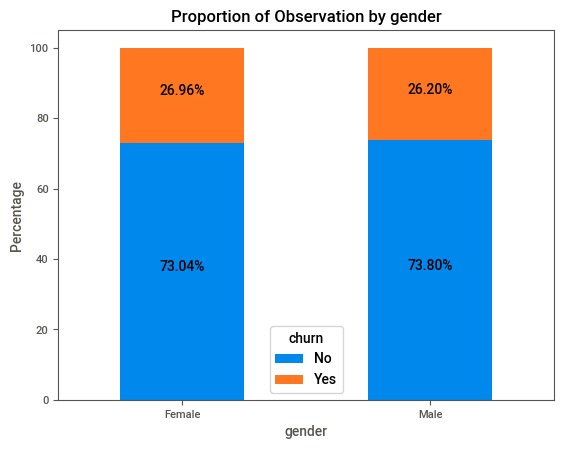

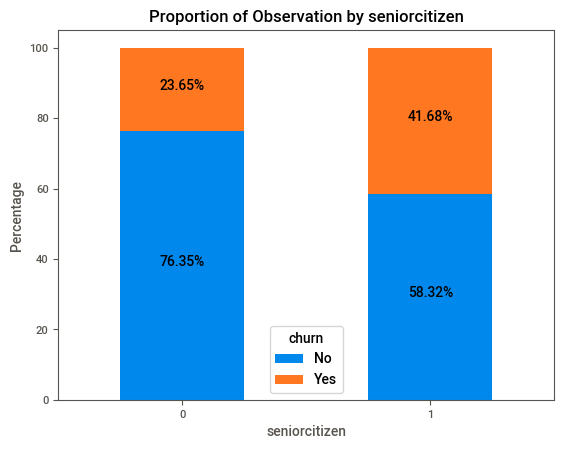

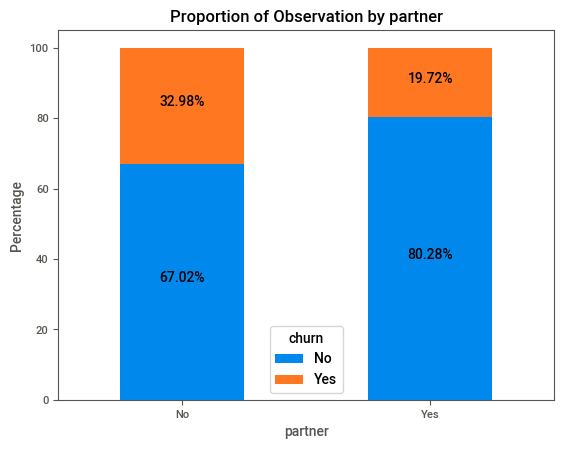

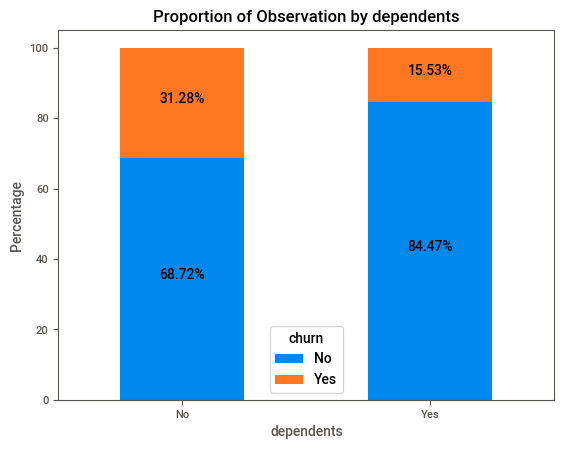

In [33]:
# Demographic column names
demographic_columns = ['gender', 'seniorcitizen', 'partner', 'dependents']

# Stacked plot of demographic columns
for column in demographic_columns:
    plot_categorical_stacked_bars(df_telco, column)

*Visualization Insights*
- The churn rate of senior citizens is almost double that of young citizens.
- We do not expect gender to have significant predictive power. A similar percentage of churn is shown both when a customer is a man or a woman.
- Customers with a partner/dependents churn less than customers with no partner.attribute.

**Customer Account Information — Categorical variables: (Contract, PaperlessBilling, PaymentMethod).**

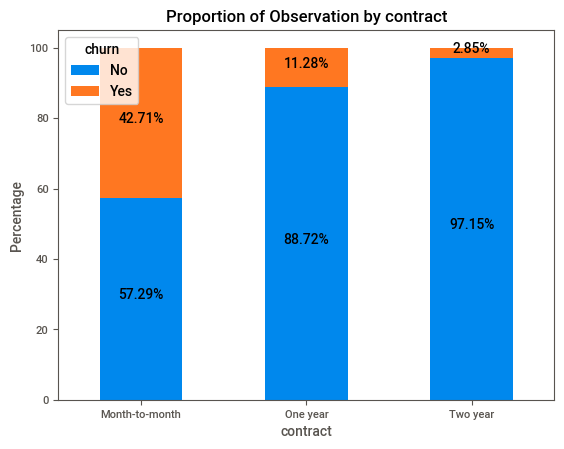

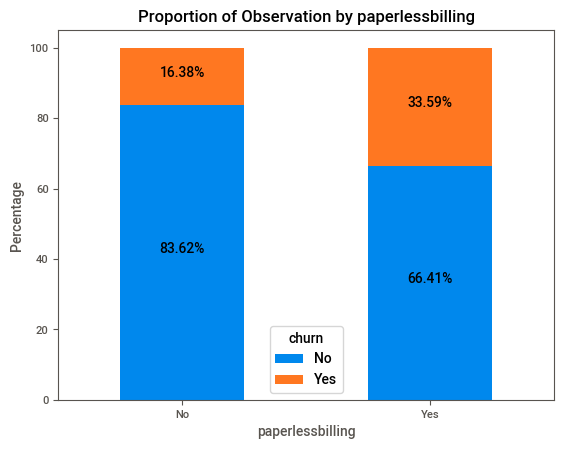

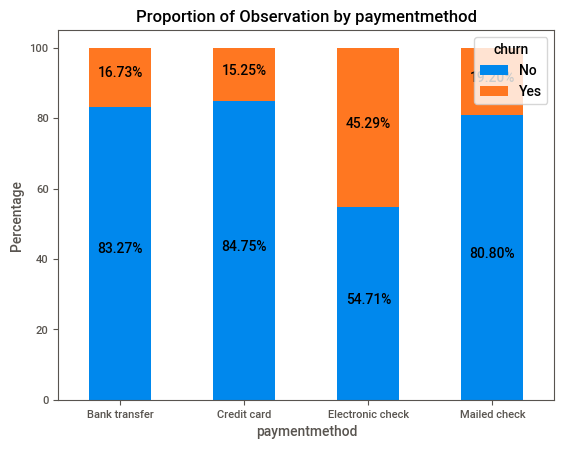

In [34]:
# Customer account column names
account_columns = ['contract', 'paperlessbilling', 'paymentmethod']

# Stacked plot of Customer account column names
for column in account_columns:
    plot_categorical_stacked_bars(df_telco, column)

*Visualization Insights*
- Customers with month-to-month contracts have higher churn rates compared to clients with yearly contracts.
- Customers who opted for an electronic check as a payment method are more likely to leave the company.
- Customers subscribed to paperless billing churn more than those who are not subscribed.

**Customer Account Information — Numerical variables: (tenure, MonthlyCharges, TotalCharges)**

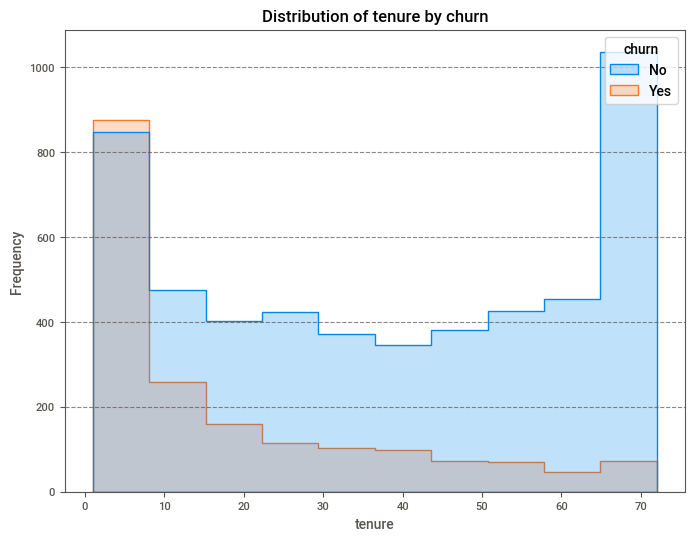

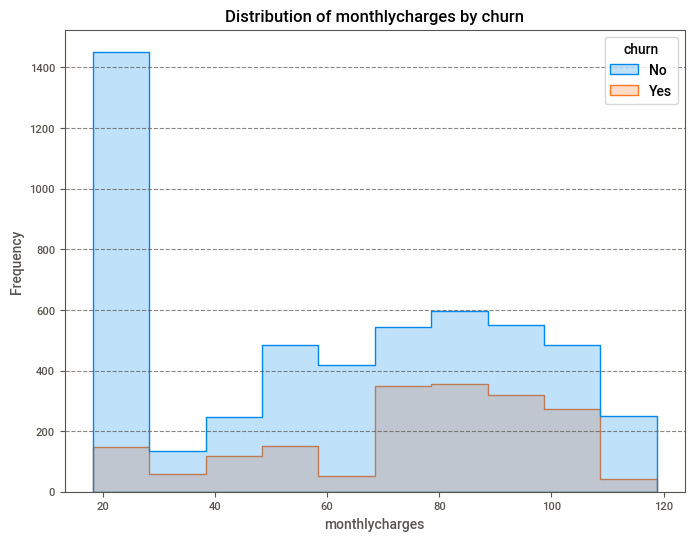

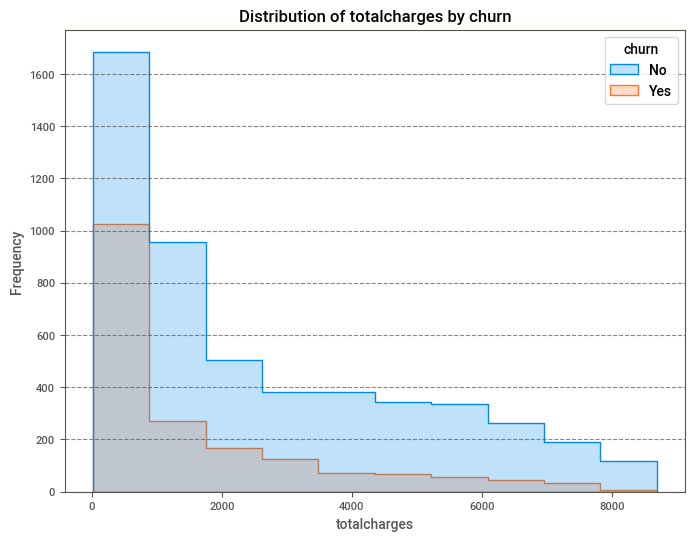

In [35]:
# customer account column names
account_columns_numeric = ['tenure', 'monthlycharges', 'totalcharges']
# histogram of costumer account columns 
plot_histograms(df_telco, account_columns_numeric)

*Visualization Insights*
- New customers (low tenure) are more likely to churn.
- The churn rate tends to be larger when monthly charges are high.
- Clients with high total charges are less likely to leave the company.

**Services Information: (PhoneService, MultipleLines, InternetServices, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies)**

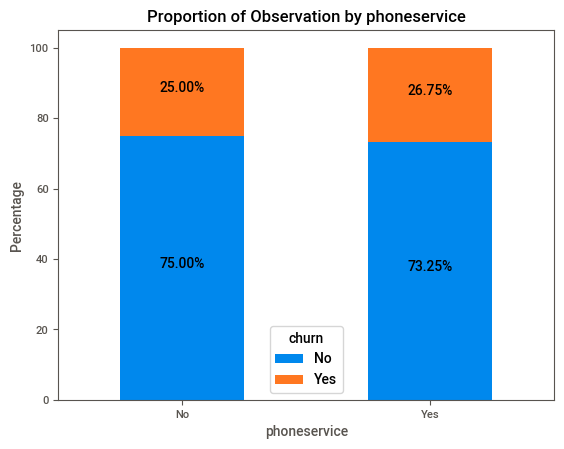

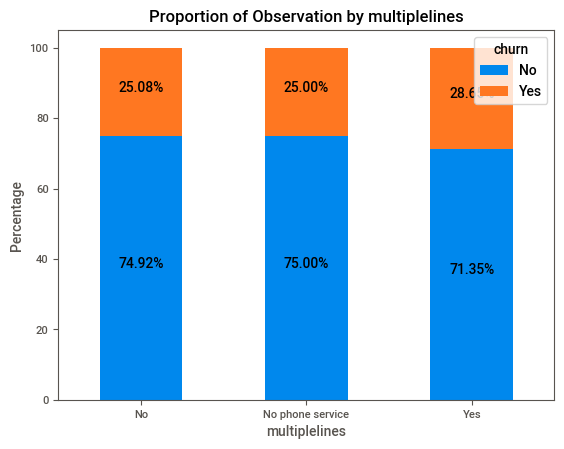

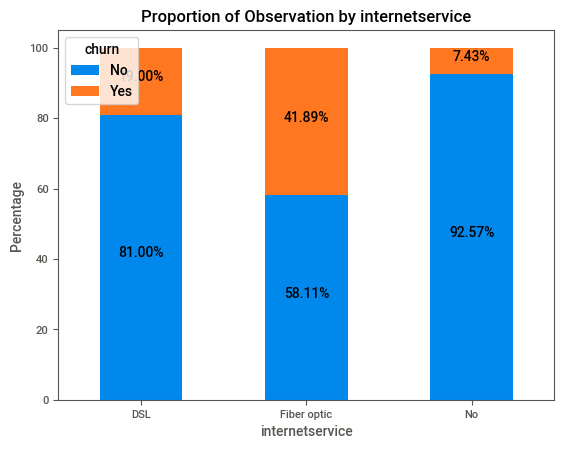

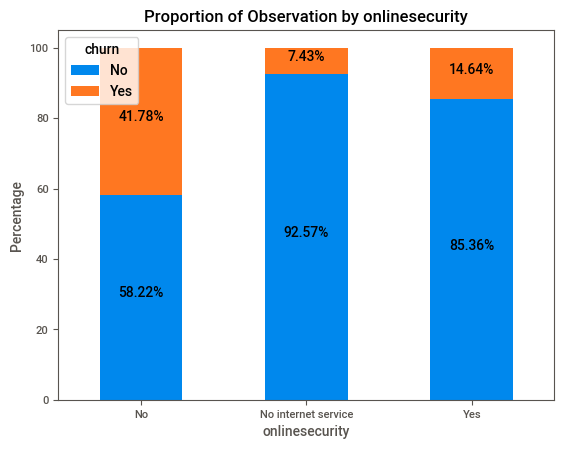

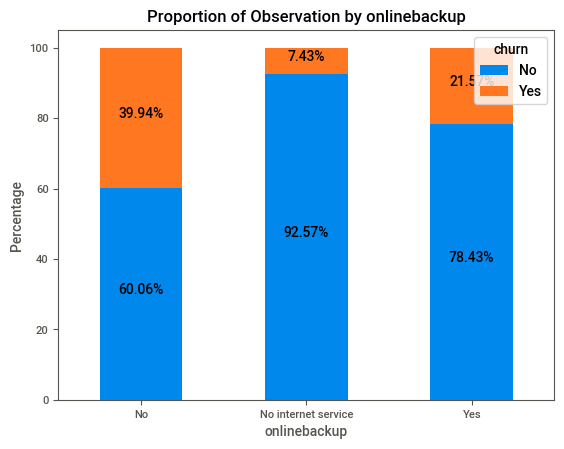

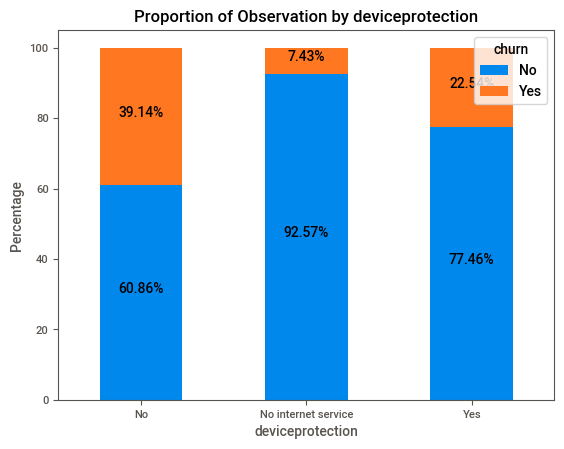

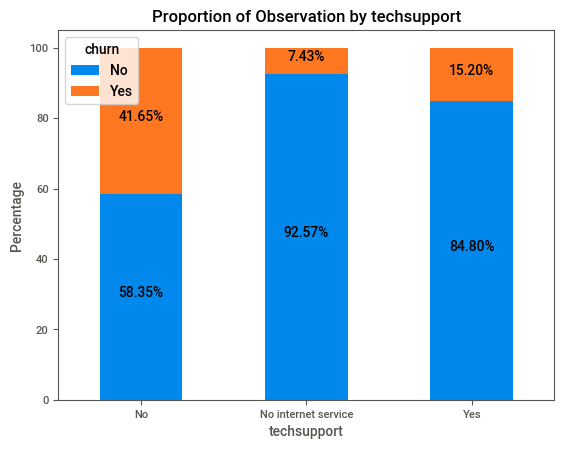

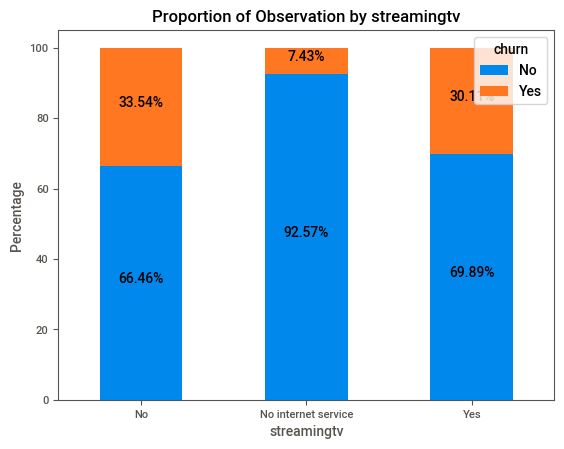

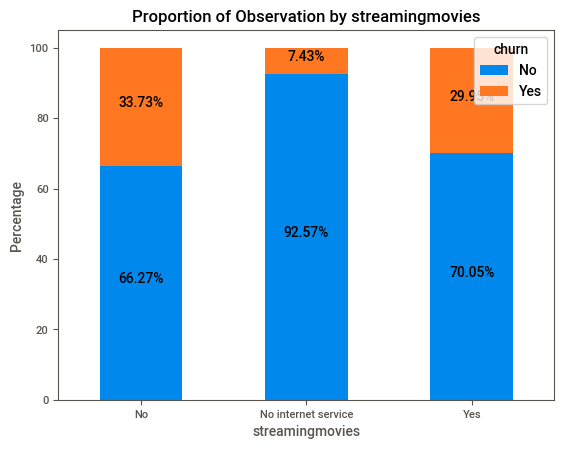

In [36]:
# services column names
services_columns = ['phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity',
                   'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies']

# stacked plot of services columns
for column in services_columns:
    plot_categorical_stacked_bars(df_telco, column)

*Visualization Insights*
- We do not expect phone attributes (PhoneService and MultipleLines) to have significant predictive power.
- Clients with Fibre Optic as an internet service tend to churn more.
- Clients with online security churn less than those without it.
- Customers with no tech support tend to churn more often than those with tech support.
- The percentage of churn for all other classes in both independent variables is nearly the same.

***By examining the visuals above, we can identify the most relevant attributes for detecting churn. We expect these attributes to be discriminative in our future models.***

**Also, from the sweetviz report**
- Contract (0.17), OnlineSecurity (0.11), TechSupport (0.11),
- tenure (0.35), TotalCharges (0.20), and MonthlyCharges (0.19) can provide information on Churn considering the correlation ratios provided in parentheses.
- These relationship can be further confirmed using Chi-Squares test of independence.

## Hypothesis Testing
Using Chi-Square Test=] to test if a categorical column has a relation with churn label

In [42]:
from scipy.stats import chi2_contingency

categorical_columns = df_telco.drop(['churn'], axis=1).select_dtypes(include='object').columns

alpha = 0.05  # Set significance level

# Create an empty DataFrame to store results
chi_square_results = pd.DataFrame(columns=['Variable', 'Chi-Square Value', 'P-value', 'Significance'])

# Perform a Chi-Square Test for each categorical column
for col in categorical_columns:
    contingency_table = pd.crosstab(df_telco[col], df_telco['churn'])
    chi2, p, _, _ = chi2_contingency(contingency_table)

    significance = 'Yes' if p < alpha else 'No'  # Check for significance

    chi_square_results = pd.concat([chi_square_results, pd.DataFrame({
        'Variable': [col],
        'Chi-Square Value': [chi2],
        'P-value': [p],
        'Significance': [significance]
    })], ignore_index=True)

print(chi_square_results)


            Variable  Chi-Square Value        P-value Significance
0             gender          0.475455   4.904885e-01           No
1      seniorcitizen        158.440816   2.479256e-36          Yes
2            partner        157.503151   3.973798e-36          Yes
3         dependents        186.321639   2.019659e-42          Yes
4       phoneservice          0.873733   3.499240e-01           No
5      multiplelines         11.271541   3.567927e-03          Yes
6    internetservice        728.695614  5.831199e-159          Yes
7     onlinesecurity        846.677389  1.400687e-184          Yes
8       onlinebackup        599.175185  7.776099e-131          Yes
9   deviceprotection        555.880327  1.959389e-121          Yes
10       techsupport        824.925564  7.407808e-180          Yes
11       streamingtv        372.456502   1.324641e-81          Yes
12   streamingmovies        374.268432   5.353560e-82          Yes
13          contract       1179.545829  7.326182e-257         

*Insight*
- For variables such as 'gender' and 'phoneservice', the P-value is greater than 0.05, indicating that there is no statistically significant association with churn.
- Variables such as **'seniorcitizen', 'partner', 'dependents', 'multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling', and 'paymentmethod'** *have very low P-values (close to zero), suggesting a statistically significant association with churn.* Hence, are likely to be important predictors of churn, as there is evidence of a statistically significant association.
- This further confirms our previous visualization analysis.

# Feature Importance
**Mutual information — analysis of linear and nonlinear relationships**
Mutual information is a measure of the dependency between two variables in machine learning, indicating the usefulness of the independent variable in predicting the target. It is implemented in the Scikit-Learn library's metrics package, allowing for the identification of predictor variables that are independent of the target (churn).

In [43]:
from sklearn.metrics import mutual_info_score

# Function that computes the mutual information score between a categorical series and the column Churn
def compute_mutual_information(categorical_series):
    return mutual_info_score(categorical_series, df_telco.churn)

contract            0.098182
onlinesecurity      0.064528
techsupport         0.062873
internetservice     0.055394
onlinebackup        0.046659
paymentmethod       0.044423
deviceprotection    0.043784
streamingmovies     0.031918
streamingtv         0.031803
paperlessbilling    0.019119
dependents          0.014270
partner             0.011383
seniorcitizen       0.010533
multiplelines       0.000798
phoneservice        0.000069
gender              0.000037
dtype: float64


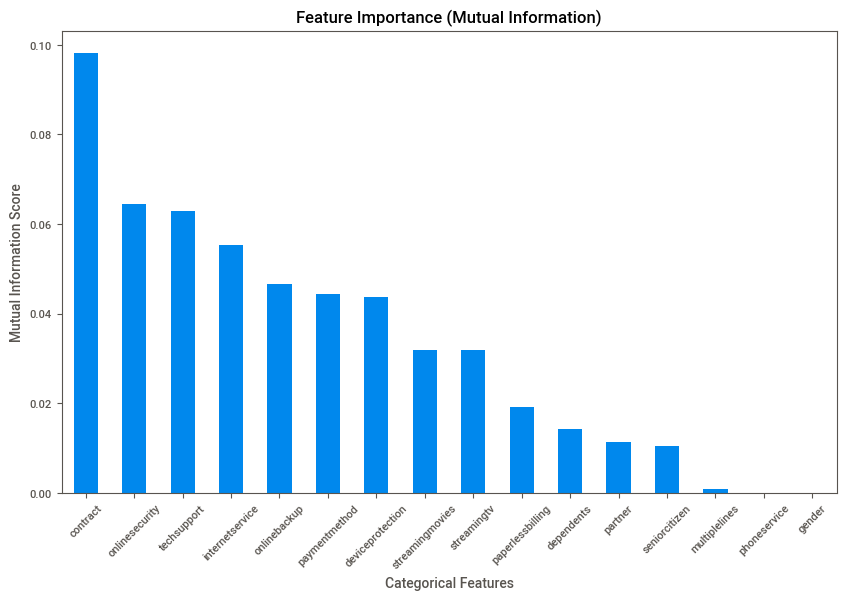

In [44]:
# select categorial variables excluding the response variable 
categorical_variables = df_telco.select_dtypes(include=object).drop('churn', axis=1)
feature_importance = categorical_variables.apply(compute_mutual_information).sort_values(ascending=False)

print(feature_importance)

plt.figure(figsize=(10, 6))
feature_importance.plot(kind='bar')
plt.title('Feature Importance (Mutual Information)')
plt.xlabel('Categorical Features')
plt.ylabel('Mutual Information Score')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

**As shown above,**
- Again, gender, phoneservice, and multiplelines have a mutual information score really close to 0, meaning those variables do not have a strong relationship with the target.
- This information is in line with the conclusions we have previously drawn through hypothesis testing and data visualization.
- *In the following steps, I would be removing those variables from the data set before training as they do not provide useful information for predicting the outcome.*

***Mutual information extends the concept of correlation to nonlinear relationships since, unlike Pearson's correlation coefficient, this approach can detect both linear and nonlinear relationships.***

In [45]:
df_telco_transformed = df_telco.drop(['gender', 'phoneservice', 'multiplelines'], axis=1).copy()

# Feature Engineering

This involves extracting features and transforming them into machine-learning models implemented using Pandas or Scikit-Learn. This will involve converting both numerical and categorical variables:
- Encoding categorical attributes into numerical labels (Label Encoding for binary variables): partner, dependents,paperlessbilling, and churn
- One-hot encoding creates a new binary column for each level of the categorical variable: contract, paymentmethod, internetservices, onlinesecurity, onlinebackup, deviceprotection, techsupport, streamingtv, and streamingmovies. ***This encoding method has a significant increase in dataset dimensionality, making it unsuitable for categorical columns with a large number of unique values due to the curse of dimensionality.***
- Transforming numeric columns into a common scale to prevent large values from dominating the learning process (Data Normalization): ***a machine learning technique that converts numeric columns to a common scale, ensuring that all variables have a similar influence on the model, improving the stability and performance of the learning algorithm.***
- The seniorcitizen column is already a binary column and would not be modified.

In [46]:
# Label Encoding 
binary_variables = [ 'partner', 'dependents', 'paperlessbilling', 'churn']

# encode categorical binary features using label encoding
for column in binary_variables:
        df_telco_transformed[column] = df_telco_transformed[column].map({'Yes': 1, 'No': 0}) 

In [47]:
# one-hot encoding (categorical variables with more than two levels)
cat2_variables = ['internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection', 
                            'techsupport', 'streamingtv',  'streamingmovies', 'contract', 'paymentmethod']

df_telco_transformed = pd.get_dummies(df_telco_transformed, columns = cat2_variables)

In [50]:
# min-max normalization (numeric variables)
from sklearn.preprocessing import MinMaxScaler
num2_columns = ['tenure', 'monthlycharges', 'totalcharges']

for column in num2_columns:
        min_column = df_telco_transformed[column].min()
        max_column = df_telco_transformed[column].max()
        # min max scaler
        df_telco_transformed[column] = (df_telco_transformed[column] - min_column) / (max_column - min_column)   


In [51]:
print(df_telco_transformed.shape)
df_telco_transformed.head().T

(7032, 36)


,0,1,2,3,4
seniorcitizen,0,0,0,0,0
partner,1,0,0,0,0
dependents,0,0,0,0,0
tenure,0.0,0.464789,0.014085,0.619718,0.014085
paperlessbilling,1,0,1,0,1
monthlycharges,0.115423,0.385075,0.354229,0.239303,0.521891
totalcharges,0.001275,0.215867,0.01031,0.210241,0.01533
churn,0,0,1,0,1
internetservice_DSL,1,1,1,1,0
internetservice_Fiber optic,0,0,0,0,1


## Baseline Selection
- In machine learning, it is common to use a baseline classifier to assess model performance. For this classification task, I'll be *using (stratified option) as a baseline. But I'll ensure the dataset is balanced*
- **Models should perform better than this baseline to be useful for future predictions.**

# Data Split
- To build a model, I'll split the data into training and testing sets.
- The training set uses machine learning algorithms, while the testing set evaluates performance using unseen data.
- Create a variable X to store the independent attributes of the dataset.
- Additionally, create a variable y to store only the target variable (churn).
- Create both  training and testing sets (75%/25%) using the train_test_split function from the sklearn.model_selection package

In [52]:
# select independent and target variables
X = df_telco_transformed.drop(columns='churn')
y = df_telco_transformed.loc[:, 'churn']

# prove that the variables were selected correctly
print(X.columns)
print(y.name)

Index(['seniorcitizen', 'partner', 'dependents', 'tenure', 'paperlessbilling',
       'monthlycharges', 'totalcharges', 'internetservice_DSL',
       'internetservice_Fiber optic', 'internetservice_No',
       'onlinesecurity_No', 'onlinesecurity_No internet service',
       'onlinesecurity_Yes', 'onlinebackup_No',
       'onlinebackup_No internet service', 'onlinebackup_Yes',
       'deviceprotection_No', 'deviceprotection_No internet service',
       'deviceprotection_Yes', 'techsupport_No',
       'techsupport_No internet service', 'techsupport_Yes', 'streamingtv_No',
       'streamingtv_No internet service', 'streamingtv_Yes',
       'streamingmovies_No', 'streamingmovies_No internet service',
       'streamingmovies_Yes', 'contract_Month-to-month', 'contract_One year',
       'contract_Two year', 'paymentmethod_Bank transfer',
       'paymentmethod_Credit card', 'paymentmethod_Electronic check',
       'paymentmethod_Mailed check'],
      dtype='object')
churn


In [53]:
from sklearn.model_selection import train_test_split

# split the data in training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=40, shuffle=True)

In [54]:
y_train.value_counts()

0    3853
1    1421
Name: churn, dtype: int64

# Handling Class Imbalance:
- Crucial for creating a reliable machine-learning model.
- The above output indicates data is imbalanced and performing ML algorithms will only favour customers who do not churn since they are the most frequent entity.
- SMOTE (Synthetic Minority Over-sampling Technique) will be implemented to balance the dataset to avoid bias in the algorithm

In [55]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42) # Initialize the SMOTE

# Fit and transform the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train) 
print(y_train_resampled.value_counts())

0    3853
1    3853
Name: churn, dtype: int64


# Assessing Multiple Algorithms

This project compares the Scikit-Learn algorithms below to evaluate their performance and potential for further evaluation:
1. Dummy classifier (baseline)
2. Logistic Regression: a simple and interpretable algorithm for binary classification.
3. Random Forest: an ensemble method that combines multiple decision trees.
4. K-Nearest Neighbors (KNN): a simple instance-based learning algorithm
5. Support Vector Machines (SVM): a powerful algorithm for classification tasks
6. Gradient Boosting (e.g., XGBoost): a an ensemble technique known for its high accurycy.n.

In [56]:
# import libraries
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

In [57]:
# function to house all proposed algorithms
def create_mlmodels(seed=2):
    mlmodels = []
    mlmodels.append(('dummy_classifier', DummyClassifier(random_state=seed, strategy='stratified')))
    mlmodels.append(('logistic_regression', LogisticRegression(random_state=seed ,max_iter=1000)))   
    mlmodels.append(('random_forest', RandomForestClassifier(random_state=seed)))
    mlmodels.append(('k_nearest_neighbors', KNeighborsClassifier()))
    mlmodels.append(('support_vector_machines', SVC(random_state=seed)))
    mlmodels.append(('gradient_boosting', GradientBoostingClassifier(random_state=seed)))
    
    return mlmodels

# Create a list with all the algorithms we are going to assess
models = create_mlmodels()

## KFold & Model Performace
The last step of the machine learning process is to check the performance of the model (best hyperparameters ) by using:
- Confusion Matrix and
- Evaluation metrics

In [59]:
# import libraries
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold

**Including k-fold cross-validation to avoid overfitting when testing the accuracy of each model.**
Cross-validation provides a more robust estimate of a model's performance by splitting the dataset into multiple folds and evaluating the model on different subsets of the data.

In [61]:
# Define the number of folds (k)
k = 5

results = []
names = []

for name, model in models:
    # Create a KFold cross-validator
    kf = KFold(n_splits=k, shuffle=True, random_state=42)

    # Perform cross-validation and get accuracy scores
    accuracy_scores = cross_val_score(model, X_train_resampled, y_train_resampled, cv=kf, scoring='accuracy')
    mean_accuracy = accuracy_scores.mean() # Calculate the mean accuracy across all folds

    results.append((name, mean_accuracy))
    names.append(name)

# Create a data frame from the results
results_df = pd.DataFrame(results, columns=['Classifier', 'Mean Accuracy'])
print(results_df)

                Classifier  Mean Accuracy
0         dummy_classifier       0.503246
1      logistic_regression       0.816378
2            random_forest       0.847522
3      k_nearest_neighbors       0.806646
4  support_vector_machines       0.816249
5        gradient_boosting       0.808201


*Insight*
- Considering that I've trained all algorithms with default hyperparameters. Many machine learning algorithms' accuracy depends on hyperparameter selection. A comprehensive analysis requires testing various hyperparameters, but the focus is on the model with the highest mean accuracy.
- This project will focus on the random_forest, which has a high accuracy of nearly 85% using default hyperparameters.

## Confusion Matrix
A confusion matrix, or error matrix, assesses a machine learning model by showing how many observations it correctly and incorrectly classified. It's a table with predicted classes in columns and actual classes in rows (or vice versa). In a perfect model, it has all zeros except the diagonal, which indicates correct predictions. Off-diagonal elements reveal misclassifications, helping us identify patterns and the extent of incorrect classifications.

In binary classification problems, the confusion matrix is a 2-by-2 matrix composed of 4 elements:
- TN (True Negative): number of customers that will not churn who are correctly classified as not churn.
- TP (True Positive): number of customers that will churn that are correctly classified as churn.
- FN (False Negative): number of customers that will not churn that are misclassified as churn.
- FP (False Positive): number of customers that will churn that are wrongly classified as not churn.

In [62]:
from sklearn.metrics import confusion_matrix

# Create an empty list to store the confusion matrices and model names
confusion_matrix_result = []

# Iterate through the list of models and compute confusion matrices
for model_name, model in models:
    model.fit(X_train, y_train)  
    y_pred = model.predict(X_test)  
    cm = confusion_matrix(y_test, y_pred)
    
    # Append the model name and confusion matrix as a tuple
    confusion_matrix_result.append((model_name, cm))

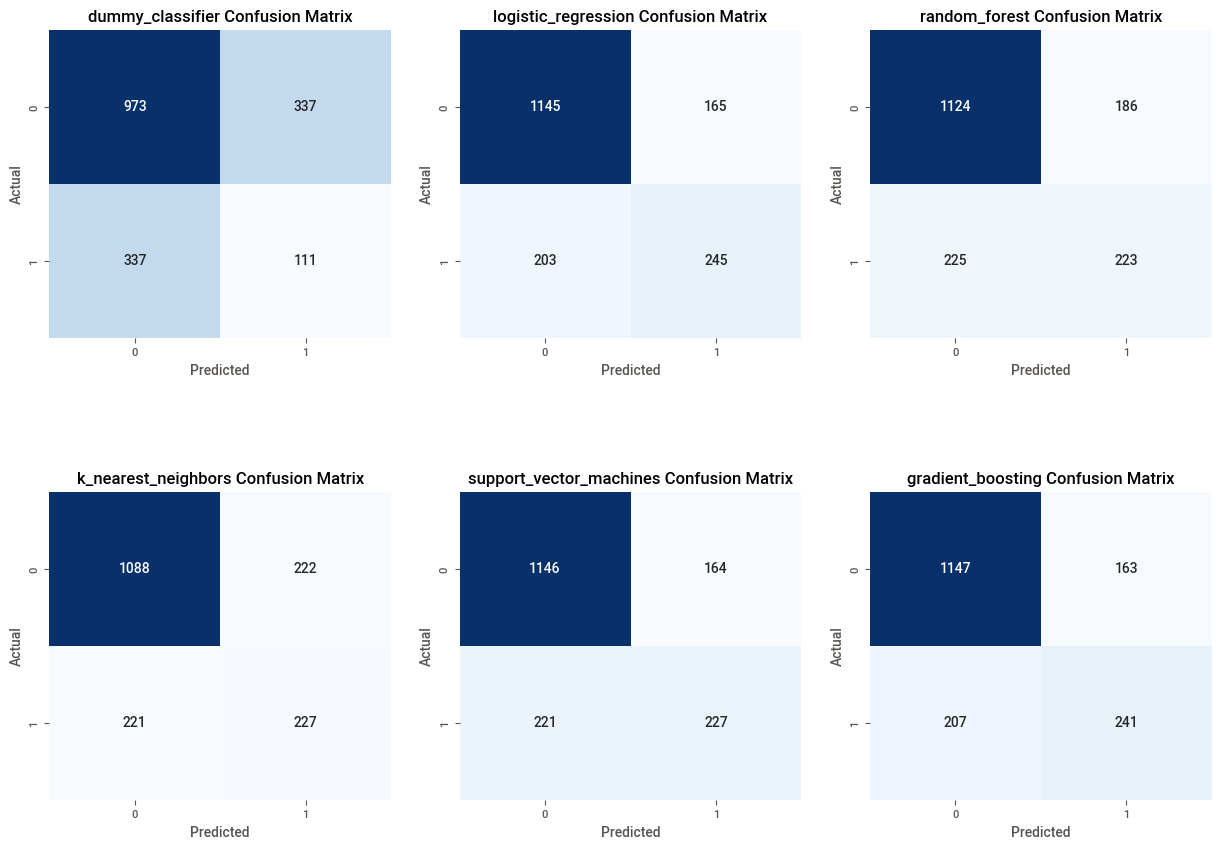

                           TN   FP   FN   TP
Model                                       
dummy_classifier          973  337  337  111
logistic_regression      1145  165  203  245
random_forest            1124  186  225  223
k_nearest_neighbors      1088  222  221  227
support_vector_machines  1146  164  221  227
gradient_boosting        1147  163  207  241


In [63]:
# Set the number of rows and columns for subplots
n_rows = 2
n_cols = 3

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))
plt.subplots_adjust(hspace=0.5)

for i, (model_name, cm) in enumerate(confusion_matrix_result):
    ax = axes[i // n_cols, i % n_cols]
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)
    ax.set_title(f'{model_name} Confusion Matrix')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

# Remove empty subplots if the number of models is less than n_rows * n_cols
if len(confusion_matrix_result) < n_rows * n_cols:
    for i in range(len(confusion_matrix_result), n_rows * n_cols):
        fig.delaxes(axes[i // n_cols, i % n_cols])

plt.show()

# Convert the list of tuples to a DataFrame
confusion_matrix_df = pd.DataFrame({
    'Model': [model_name for model_name, _ in confusion_matrix_result],
    'TN': [cm[0, 0] for _, cm in confusion_matrix_result],
    'FP': [cm[0, 1] for _, cm in confusion_matrix_result],
    'FN': [cm[1, 0] for _, cm in confusion_matrix_result],
    'TP': [cm[1, 1] for _, cm in confusion_matrix_result]
})

confusion_matrix_df.set_index('Model', inplace=True) # Set 'Model' as the index
print(confusion_matrix_df)

*Insight*
- Similarly, in the confusion matrix, the Random Forest model shows good performance in all metrics, with lower false positives and false negatives compared to some other models.

## Evaluation Metrics

In [64]:
from sklearn.metrics import classification_report

# Define a list to store classification reports
classification_reports = []

# Iterate through the list of models
for model_name, model in models:
    y_pred_test = model.predict(X_test)
    report = classification_report(y_test, y_pred_test)
    classification_reports.append((model_name, report))

# Display the classification reports
for model_name, report in classification_reports:
    print(f"Model: {model_name}\n{report}\n{'='*50}\n")


Model: dummy_classifier
              precision    recall  f1-score   support

           0       0.74      0.74      0.74      1310
           1       0.25      0.25      0.25       448

    accuracy                           0.62      1758
   macro avg       0.50      0.50      0.50      1758
weighted avg       0.62      0.62      0.62      1758


Model: logistic_regression
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1310
           1       0.60      0.55      0.57       448

    accuracy                           0.79      1758
   macro avg       0.72      0.71      0.72      1758
weighted avg       0.79      0.79      0.79      1758


Model: random_forest
              precision    recall  f1-score   support

           0       0.83      0.86      0.85      1310
           1       0.55      0.50      0.52       448

    accuracy                           0.77      1758
   macro avg       0.69      0.68      0.68      1758


*Insight*
- Considering these metrics, the choice of the "best" model depends on the specific objectives.
- If precision is more important (minimizing false positives), Logistic Regression or Gradient Boosting might be preferred.
- If recall is crucial (minimizing false negatives), Random Forest or Logistic Regression might be considered.
  
**Based on the goal of minimizing customer churn and considering a balance between precision and recall, Logistic Regression, Random Forest, and Gradient Boosting seem to be reasonable choices.** *These models show a better trade-off between identifying true churn cases and avoiding false positives.*

- It's recommended to further fine-tune these models or explore ensemble approaches to improve their performance on the specific objective of minimizing customer churn. 
- Additionally, consider the business context and the costs associated with false positives and false negatives to make a well-informed decision.

# Suggestions for the next steps in analyzing the data
- Customer Segmentation: We can explore customer segmentation to better understand different customer groups.

# Summary Findings and Recommendations:
## Summary Findings

1. **Gender Impact on Churn:**
   - Gender does not significantly influence churn. Both males and females exhibit similar proportions of churn and non-churn.

2. **Dependents/Partners Impact:**
   - The presence of dependents or partners appears to reduce the likelihood of churn. Customers with a partner or dependents are less likely to churn.

3. **Tenure and Monthly Charges:**
   - Longer-tenured customers tend to have slightly higher monthly charges, suggesting a subtle trend of long-term customers opting for higher-priced services.
   - Customers who have churned show slightly higher average monthly charges.

4. **Churn and Tenure Relationship:**
   - Longer-tenured customers are less likely to churn, as evident from the lower average tenure for churned customers.

5. **Total Charges and Churn:**
   - Customers with higher total charges are less likely to churn, indicating a positive correlation between total charges and customer retention.

6. **Internet Services Impact:**
   - Customers without internet services have lower monthly charges and shorter tenures compared to DSL and fibre optic subscribers.
   - Fiber optic subscribers tend to have higher churn rates.

7. **Multiple Services Impact:**
   - The more services a customer subscribes to, the higher their total charges, suggesting a positive correlation between service subscriptions and total charges.

8. **Tenure and Churn Relationship:**
   - New customers with low tenure are more likely to churn.

9. **Monthly Charges Impact:**
   - Higher monthly charges are associated with a larger churn rate.

10. **Senior Citizens Churn Rate:**
    - The churn rate for senior citizens is almost double that of young citizens.

11. **Contract Type Impact:**
    - Customers with month-to-month contracts have higher churn rates compared to clients with yearly contracts.

12. **Payment Method Impact:**
    - Customers opting for electronic check as a payment method are more likely to leave the company.

13. **Billing Preferences Impact:**
    - Customers subscribed to paperless billing churn more than those not subscribed.

14. **Internet Service Type Impact:**
    - Clients with Fiber Optic as an internet service tend to churn more.

15. **Tech Support Impact:**
    - Clients with no tech support tend to churn more often than those with tech support.

## Recommendations:

1. **Promote Partner/Dependent Packages:**
   - Consider promoting packages that cater to customers with partners or dependents, as they show a lower likelihood of churning.

2. **Encourage Long-Term Contracts:**
   - Encourage long-term contracts to reduce churn, given the correlation between tenure and lower churn rates.

3. **Improve Fiber Optic Service Retention:**
   - Investigate factors leading to higher churn rates among Fiber Optic subscribers and work on improving service quality or offering incentives.

4. **Enhance Tech Support Services:**
   - Improve tech support services to reduce churn, as customers without tech support tend to churn more often.

5. **Optimize Billing and Payment Processes:**
   - Evaluate and optimize electronic check payment processes, and consider incentivizing alternative payment methods.

6. **Target Senior Citizens with Retention Programs:**
   - Implement targeted retention programs for senior citizens to reduce their higher churn rates.

7. **Promote Yearly Contracts:**
   - Encourage customers to opt for yearly contracts, as they exhibit lower churn rates compared to month-to-month contracts.

8. **Investigate High Monthly Charges Impact:**
   - Investigate the reasons behind the larger churn rate associated with higher monthly charges and consider adjusting pricing or offering value-added services.

9. **Educate Customers on Paperless Billing Benefits:**
   - Educate customers on the benefits of paperless billing and consider incentives to retain paperless billing subscribers.

10. **Improve Customer Onboarding for New Customers:**
    - Enhance onboarding processes for new customers to improve their retention rates.

# Conclusion

The current telecommunications market faces intense competition, making customer churn prediction a crucial aspect of customer relationship management for retaining valuable clientele. Through research, understanding the pivotal factors influencing churn and their impact on customer retention can be achieved.

Effective churn management holds significant cost-saving potential for the company. The economic value of customer retention can be summarized as follows:

1. Satisfied customers can serve as advocates, attracting new customers to the company.
2. Long-term customers are less susceptible to competitor influence.
3. Long-term customers tend to make more frequent purchases.
4. The company can prioritize meeting the needs of existing customers.
5. Lost customers may share negative experiences, adversely affecting the company's image.

Therefore, viewing customer retention as a function of factors such as price, service quality, customer satisfaction, and brand image can contribute to fostering better customer loyalty.